# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [33]:
file_path = 'Dataset .csv'  
data = pd.read_csv(file_path)

# First Row of Dataset

In [34]:
print(data.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Sampling Data for Faster Processing

In [35]:
data_sampled = data.sample(n=500, random_state=42)


# Identifying Numeric and Non-numeric Columns 

In [36]:
numeric_cols = data_sampled.select_dtypes(include=[np.number]).columns
non_numeric_cols = data_sampled.select_dtypes(exclude=[np.number]).columns
print("Numeric columns:", numeric_cols)
print("Non-numeric columns:", non_numeric_cols)

Numeric columns: Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')
Non-numeric columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


# Preprocessing the dataset

In [37]:
# Handle missing values for numeric columns
data_sampled[numeric_cols] = data_sampled[numeric_cols].fillna(data_sampled[numeric_cols].mean())

# Handle missing values for non-numeric columns
data_sampled[non_numeric_cols] = data_sampled[non_numeric_cols].fillna(data_sampled[non_numeric_cols].mode().iloc[0])

# Encode categorical variables


In [38]:
data_sampled = pd.get_dummies(data_sampled, drop_first=True)


# Limit the number of features for the heatmap

In [39]:
corr_features = data_sampled.columns[:20] 

# Display correlation heatmap

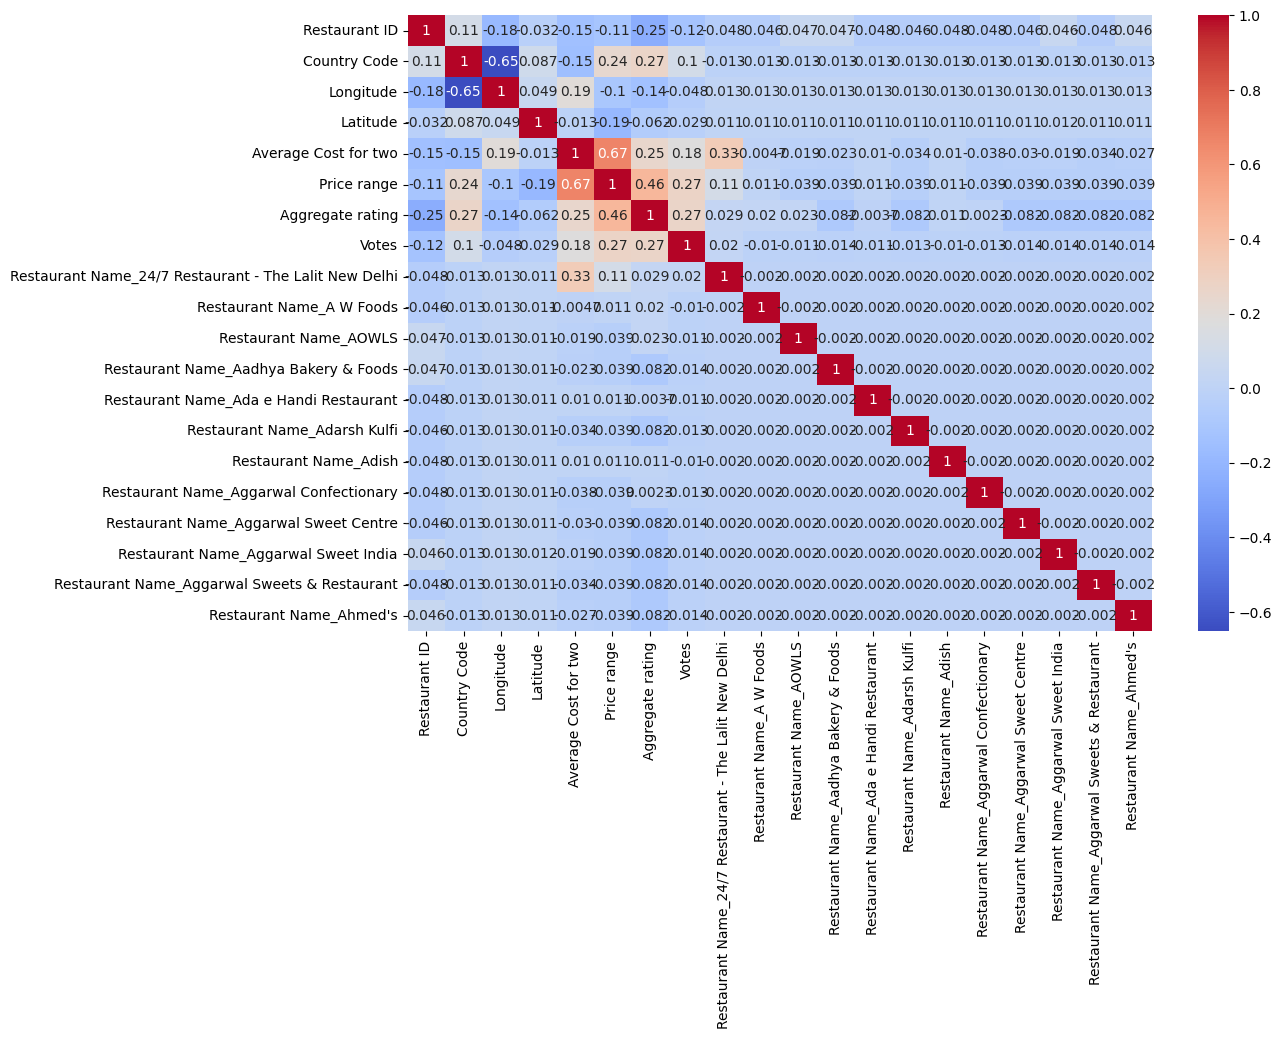

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_sampled[corr_features].corr(), annot=True, cmap='coolwarm')
plt.show()


# Splitting Data

In [41]:
# Split the data into features and target
target_column = 'Aggregate rating'  # Replace with the actual target column name
X = data_sampled.drop(target_column, axis=1)
y = data_sampled[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initializing Models

In [42]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=10)  # Reduced n_estimators for faster processing
}

# Training and evaluating models

In [43]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r_squared}')

    # Cross-validation
    scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')  # Reduced cv to 3 for faster processing
    print(f'{name} - Cross-validated MSE: {np.mean(-scores)}')

Linear Regression - Mean Squared Error: 0.03693343675676325, R-squared: 0.9855537971216035
Linear Regression - Cross-validated MSE: 0.0589527993547548
Decision Tree - Mean Squared Error: 0.0462, R-squared: 0.981929258915779
Decision Tree - Cross-validated MSE: 0.04806483418704759
Random Forest - Mean Squared Error: 0.022207999999999964, R-squared: 0.9913135277489529
Random Forest - Cross-validated MSE: 0.038697027631484006


# Interpreting the best model

In [44]:
best_model = models['Random Forest']
importance = pd.Series(best_model.feature_importances_, index=X.columns)

# Plot feature importance

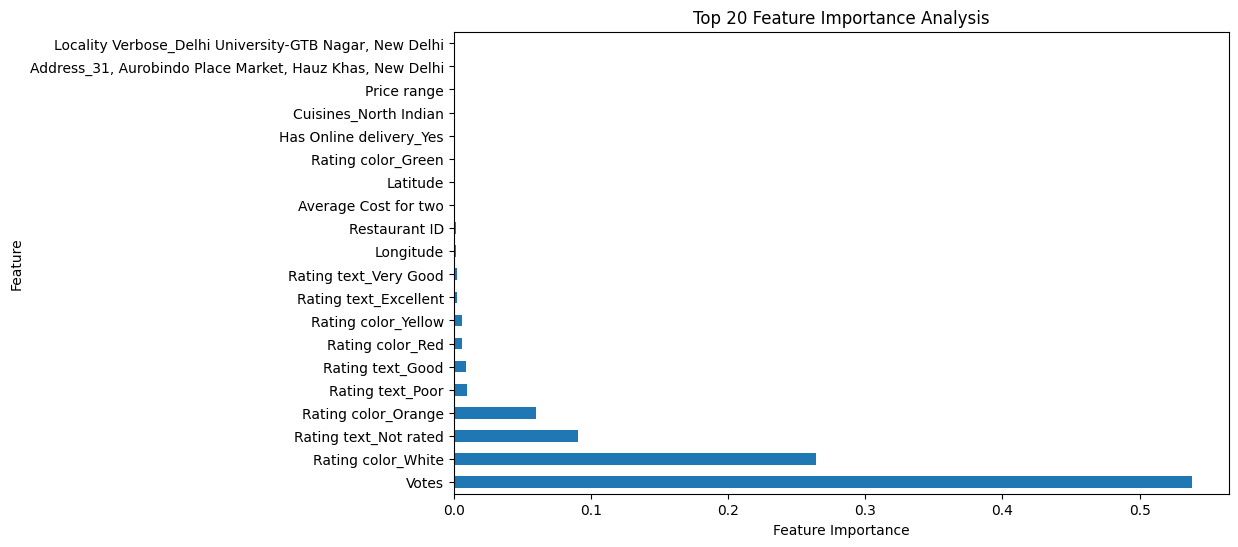

In [45]:
# Get top 20 most important features
top_n = 20
top_features = importance.sort_values(ascending=False).head(top_n)

# Plot feature importance for top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance Analysis')
plt.show()